# Random walk, con't

In the first notebook of the open course [**"Practical Numerical Methods with Python"**](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about) we discussed how the spreading of a quantity such as the concentration of food dye in a liquid could be described through a diffusion equation. We also started to consider another method which involves the modeling of the trajectories of the molecules. Now that we have learned more about random numbers in the second notebook of this module, we are ready to move forward and implement this second method.

## Stochastic equation for Brownian motion

The model equation we introduced for the evolution of the position of a molecule of dye is:

$$
dx=x(t+dt)−x(t)=ds
$$

$ds$ is a displacement resulting from the collision with surrounding water molecules and needs to be properly modelled. Technically speaking, the equation above is called a *stochastic differential equation* (SDE) as it contains a stochastic (or random) contribution. There are many phenomena that are modelled with such equations; besides Brownian motion, it is also widely used for the modelling of financial instruments like options.

Focusing for now on Brownian motion, let's see what happens if we model $ds$ as:

$$
ds=\sqrt{2 \alpha dt}\cal{N(0,1)}
$$

where $\alpha$ is the same diffusion coefficient that one would use in the diffusion equation. Moreover, at each time step, $\cal{N(0,1)}$ is a random number that is generated from a normal (Gaussian) distribution $f(n)$, centered around $0$, and with variance equal to $1$. That is:

$$
f(n)=\frac{1}{\sqrt{2\pi}}e^{-\frac12 n^2}
$$

Below we will use Numpy's built-in function to sample the Gaussian distribution. In the previous notebook you learned to program your own version of such a routine so feel free to use it instead!

Here, we assume for simplicity that the Brownian motion takes place in a one-dimensional system. It is easy to extend the model to 2D or 3D problems by adding an identical equation for each extra dimension. 

### Integration of stochastic motion

It's now time to integrate our stochastic equation. We begin by importing our usual set of libraries:

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

To warm up, we only track a particle originally at rest at $x=0$.

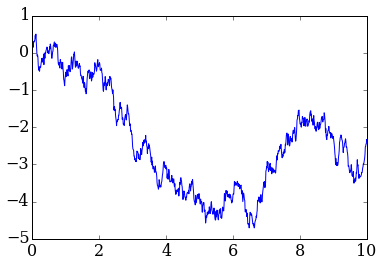

In [3]:
# Total simulation time
T=10.0

# Number of time steps and time interval dt
nt=1000
dt=T/nt

# Diffusion coefficient
alpha=0.5 # pour que sigma==sqrt(2*alpha)=1

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

# Time integration (note the use of the numpy.random.normal function)
for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)

pyplot.plot(t,x)



As expected, we see that $x$ evolves in an erratic way, with random jumps (positive or negative) between each time instant. This is encouraging, but we need to verify that our model for $ds$ is indeed able to reproduce a diffusion process. 

### Comparison with the diffusion equation

In order to estimate the evolution of a our dye, we need to follow the trajectories of a sample of molecules. From their positions, we can compute the predicted density of molecules through the expression,

$$
\rho(x,t) dx=n(x,t)/N
$$

where $n(x,t)$ represents, at a given time, the number of molecules of dye contained within an interval $dx$ centered around $x$ and $N$ is the total number of molecules used in the sample.

To test our stochastic model and make the comparison with the diffusion equation, we initialise the position of our sample of molecules with a Gaussian distribution:

$$
P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$ 

where $\sigma^2$ is the variance of the positions and $\mu$ is their average. As $n(x,0)=NP(x)dx$, we have $\rho(x,0)=P(x)$. In this case, the solution of the diffusion equation,

$$
\frac{\partial \rho}{\partial t}=\alpha \frac{\partial^2 \rho}{\partial x^2}
$$

can be computed exactly and is given by:

$$
\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-\mu)^2}{2\sigma_t^2}}
$$

with $\sigma^2_t = \sigma^2 t$. If all goes well we should recover this solution using our random walk technique.

Let us first initialise the positions of our sample molecules (we will follow 100000 of them) and check that their positions is distributed as expected:

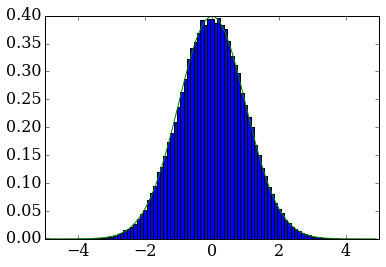

In [4]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

# We set mu=0 and sigma=1
x0 = numpy.random.normal(loc=0,scale=1,size=npart)

# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
pyplot.xlim(-5,5)
pyplot.hist(x0,bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/2.0)/numpy.sqrt(2*numpy.pi))

Looks good! Now we compute the trajectories of the molecules and plot 20 of them as an illustration.  

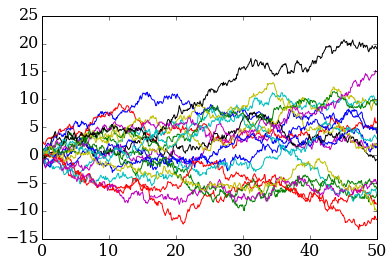

In [5]:
T=50.0
nt=500
dt=T/nt
alpha=.5

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(dt*2*alpha)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.plot(t,x[:,i])

As required, the molecules follow very different trajectories. The sample is initially packed close to 0, but as time evoles, the molecules spread on average more and more. Let us now plot the histogram of the positions at the end of the simulation and compare it to the analytical solution of the diffusion equation:

In [6]:
sigmat=numpy.sqrt(2*alpha*(T+1)) # +1 pour le sigma initial

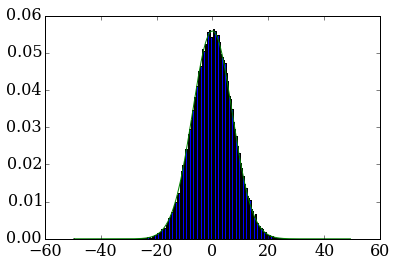

In [7]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(-50,50,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigmat**2))\
                            / numpy.sqrt(2*numpy.pi*sigmat**2))

Pretty good! Our particles have followed random trajectories but the evolution of their density is the same as if it was computed using the diffusion equation. Play with the parameters of the problem $(\alpha, \mu, \sigma, npart)$ and check that the algorithm works as expected.

## Challenge

- Add as systematic contribution to the displacement $dx$,

$$
dx=cdt+\alpha \sqrt{dt}\cal{N(0,1)}
$$

where $c$ is a constant and analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analitical solution for an initial Gaussian distribution?

- Simulate the following random walk with a 'friction' term:

$$
dx=-\gamma x dt +\alpha \sqrt{dt}\cal{N(0,1)}
$$

Check that the distribution reaches a steady state for $t\rightarrow \infty$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy!

In [8]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())

FileNotFoundError: [Errno 2] No such file or directory: '../../styles/numericalmoocstyle.css'

 ## Exercice 1:

- Etape 1 - Calcul de $\alpha$ :

    On va tout d'abord chercher à quoi correspond le coefficient de diffusion $\alpha$. Nous avons donc :
    $$\rho (x,t)= \frac {1} {\sqrt{2 \pi \sigma^2_t}} e^{-\frac {(x-\mu)^2} {2\sigma^2_t}}$$ avec
    $\sigma^2_t= 2 \alpha(T+1) $
    
    En comparant cette expression à la solution générale de l'équation de diffusion $\rho(x,t)=\frac{1}{\sqrt{4\pi \alpha t}}e^{-\frac{(x-\mu)^2}{4 \alpha t}}$, on en déduit que $\alpha=\frac{\sigma^2} {2}$

    Vérifions cela en montrant que:
    
    $$	\rightarrow \frac {\partial \rho(x,t)} {\partial t} = \alpha \frac {\partial^2 \rho(x,t)} {\partial x^2}=\frac{\sigma^2} {2} \frac {\partial^2 \rho(x,t)} {\partial x^2} $$  
    !!!!!!!!!!!! A VÉRIFIER!!!!!!!
    
    Les dérivées sont données par :
        
     - $ \frac {\partial \rho(x,t)} {\partial t} = \frac { \sigma^2} {2} \frac { \rho \cdot [(x- \mu)^2 - \sigma^2] } { \sigma^4_t} $ 
    
     - $ \frac {\partial \rho(x,t)} {\partial x} = -\rho \frac {(x- \mu)} { \sigma^2}$
     
     - $\frac{\sigma^2} {2} \frac {\partial^2 \rho(x,t)} {\partial x^2} = \frac { \sigma^2} {2} \frac { \rho \cdot [(x- \mu)^2 - \sigma^2] } { \sigma^4_t} $ 
     
     D'où l'on voit que l'on a bien : $\frac {\partial \rho(x,t)} {\partial t} = \frac{\sigma^2} {2} \frac {\partial^2 \rho(x,t)} {\partial x^2}$ et donc $\alpha=\frac{\sigma^2} {2}$
        
     

- Etape 2 - Equation et solution analytique :

Posons le changement de variable : $y=x-ct$

On suppose alors d'après la forme de la solution de l'équation de diffusion pour laquelle $ds= \sqrt{2 \alpha dt}\cal{N(0,1)} $ que la solution analytique de $ \partial_t \rho + c \partial_x \rho = \alpha \partial^2_x \rho $  (1) est la suivante : $\rho(x,t)=\frac{1}{\sqrt{2\pi \sigma^2_t}}e^{-\frac{(x-ct-\mu)^2}{2 \sigma^2_t}}$  

!!!!!!A VERIFIER!!!!!!


Vérifions que ceci est correct en calculant explicitement les dérivées. Nous avons donc:
       
   - $ \partial_t \rho= -\rho \frac{\sigma^2} {2 \sigma^2_t}+ \frac{\rho \sigma^2 (x-ct-\mu)^2} {2\sigma^4_t}+\frac{\rho c (x-ct-\mu)} {\sigma^2_t}$  
 
   - $ \partial_x \rho= \frac{-\rho  (x-ct-\mu)} {\sigma^2_t}$
  
   - $ \alpha \partial^2_x \rho = \frac{\sigma^2} {2} \frac{\rho \sigma^2 (x-ct-\mu)^2} {2\sigma^4_t} - \frac{\sigma^2} {2} \frac{\rho} {\sigma^2_t}$ 
  
   En injectant les termes çi-dessus dans l'équation (1), on en déduit que notre raisonement est correct et donc nous avons bien trouvé l'équation recherchée ainsi qu'une solution à cette dernière.
    
   

A présent, calculons la trajectoire des molécules dans cette nouvelle configuration.

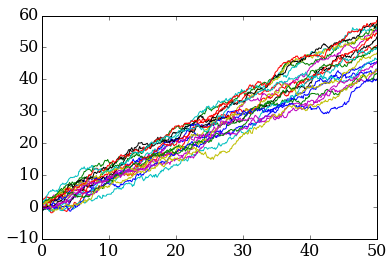

In [9]:
T=50.0
nt=500
dt=T/nt
alpha=.5
c=1

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+c*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.plot(t,x[:,i])

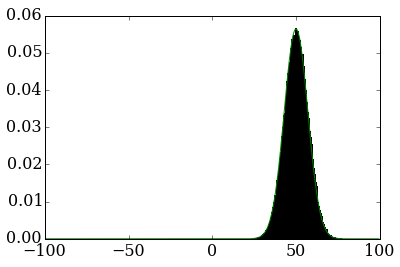

In [11]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(-100,100,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

alpha=0.5
sigma=numpy.sqrt(alpha*2)

pyplot.plot(bin_centers, numpy.exp(-(bin_centers-T)**2/(2.0*sigma**2*T))\
                            / numpy.sqrt(2*numpy.pi*sigma**2*T))


Exercice 2:

In [ ]:
T=50
nt=500
dt=T/nt
alpha=2.0
gamma=2

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]-gamma*x[i]*dt+alpha*numpy.sqrt(dt)*numpy.random.normal(0,1,npart)

for i in range(10):
    pyplot.plot(t,x[:,i])
    